In [33]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt

In [10]:
PATH_HDMS = Path('Z:/nahaUsers/casadje/datasets/hDMS')

In [72]:
services = {
    'noperational24h': 'NRT',
    'nhoperational24hw': 'HIST'
}

### River station

In [113]:
efas_id = 3036

ts_list = []
for service, name in services.items():
    file = PATH_HDMS / 'river' / service / f'{efas_id}.nc'
    if file.is_file():
        ts = xr.open_dataset(file).squeeze('ID').to_pandas()['discharge']
        ts.name = name
        ts_list.append(ts)
ts_river = pd.concat(ts_list, axis=1)

print(ts_river.shape)
ts_river.head()

(3368, 2)


,NRT,HIST
date,,
2015-12-22,0.120,NaN
2015-12-23,0.130,NaN
2015-12-24,0.123,NaN
2015-12-25,0.111,NaN
2015-12-26,0.128,NaN


In [114]:
efas_id = 994

ts_list = []
for service, name in services.items():
    file = PATH_HDMS / 'river' / service / f'{efas_id}.nc'
    if file.is_file():
        ts = xr.open_dataset(file).squeeze('ID').to_pandas()['discharge']
        ts.name = name
        ts_list.append(ts)
ts_river2 = pd.concat(ts_list, axis=1)

print(ts_river2.shape)
ts_river2.head()

(3032, 2)


,NRT,HIST
date,,
2016-11-24,0.090,NaN
2016-11-25,0.085,NaN
2016-11-26,0.081,NaN
2016-11-27,0.080,NaN
2016-11-28,0.080,NaN


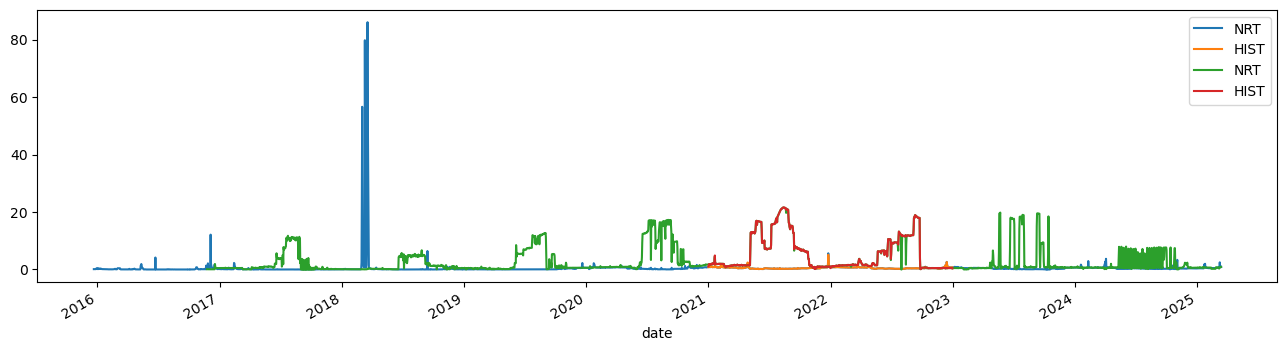

In [117]:
fig, ax = plt.subplots(figsize=(16, 4))
ts_river.plot(ax=ax)
ts_river2.plot(ax=ax)
ax.set(xlim=ts_river2.)

### Reservoir

In [94]:
efas_id = 9318

ts_list = []
for service, name in services.items():
    file = PATH_HDMS / 'reservoir' / service / f'{efas_id}.nc'
    if file.is_file():
        ts = xr.open_dataset(file).squeeze('ID').to_pandas()['outflow']
        ts.name = name
        ts_list.append(ts)
ts_reservoir = pd.concat(ts_list, axis=1)

print(ts_reservoir.shape)
ts_reservoir.head()

(11231, 1)


,HIST
date,
1990-01-01,10.192
1990-01-02,9.782
1990-01-03,13.609
1990-01-04,21.922
1990-01-05,22.033


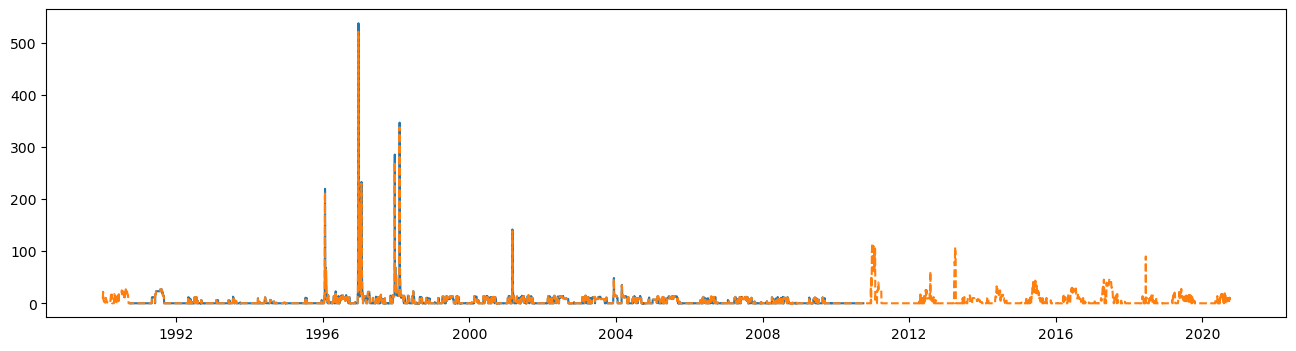

In [98]:
fig, ax = plt.subplots(figsize=(16, 4))
for col in ts_river:
    ax.plot(ts_river[col])
for col in ts_reservoir:
    ax.plot(ts_reservoir[col], ls='--')

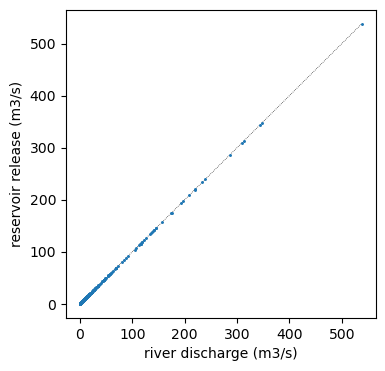

In [104]:
fig, ax = plt.subplots(figsize=(4, 4))
aux = pd.concat([ts_river.HIST, ts_river.HIST], axis=1)
aux.columns = ['river', 'reservoir']
ax.scatter(aux.river, aux.reservoir, marker='.', s=5)
vmax = aux.max().max()
ax.plot([0, vmax], [0, vmax], c='k', ls=':', lw=.5, zorder=0)
ax.set(
    xlabel='river discharge (m3/s)',
    ylabel='reservoir release (m3/s)'
);